In [11]:
import numpy as np

import book_format
book_format.set_style()

from kf_book import book_plots
from kf_book.book_plots import plot_errorbars

%matplotlib inline

### Plot Scale amounts with error bars

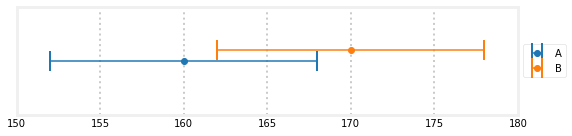

In [6]:
plot_errorbars([(160, 8, 'A'), (170, 8, 'B')], xlims=(150, 180))

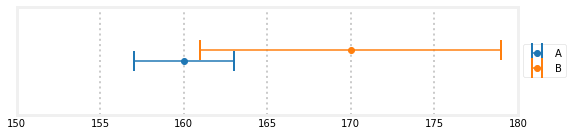

In [8]:
plot_errorbars([(160, 3, 'A'), (170, 9, 'B')], xlims=(150, 180))

### Distributions

##### Uniform

In [12]:
measurements = np.random.uniform(160, 170, size=10000)

mean = measurements.mean()

In [15]:
print("Average: {}".format(mean))

Average: 164.99160585518356


##### Normal

In [16]:
mean = np.random.normal(165, 5, size=10000).mean()
print("Average of measurements is {:.4f}".format(mean))

Average of measurements is 164.9492


### Wt Chg Hypothesis 1 over 3 days 

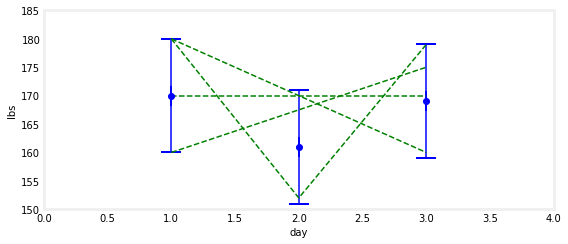

In [18]:
import kf_book.gh_internal as gh
gh.plot_hypothesis1()

### Wt Chg Hypothesis 2 over 10 days

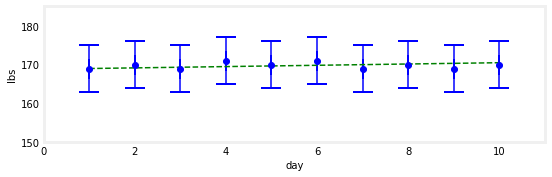

In [19]:
gh.plot_hypothesis2()

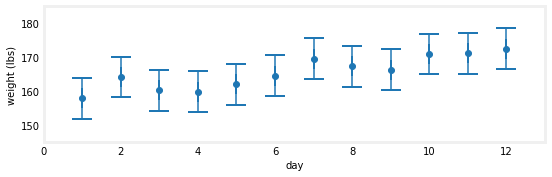

In [20]:
gh.plot_hypothesis3()

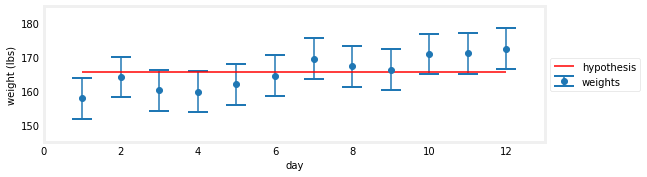

In [21]:
gh.plot_hypothesis4()

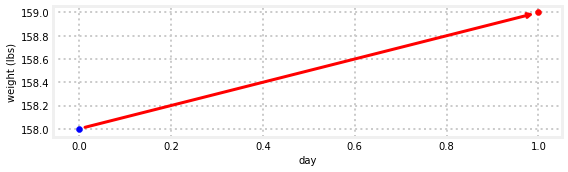

In [22]:
gh.plot_estimate_chart_1()

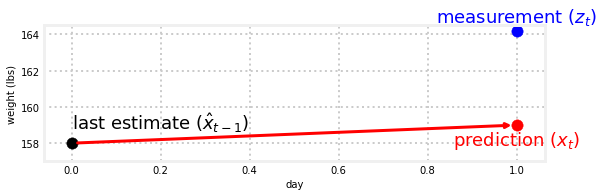

In [23]:
gh.plot_estimate_chart_2()

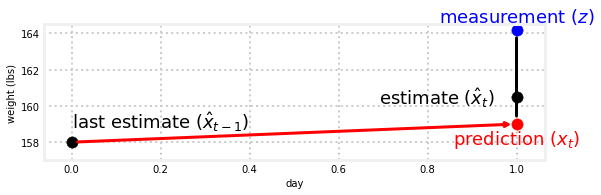

In [24]:
gh.plot_estimate_chart_3()

In [25]:
from kf_book.book_plots import figsize
import matplotlib.pyplot as plt

weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

time_step = 1.0  # day
scale_factor = 4.0/10

def predict_using_gain_guess(estimated_weight, gain_rate, do_print=False):     
    # storage for the filtered results
    estimates, predictions = [estimated_weight], []

    # most filter literature uses 'z' for measurements
    for z in weights: 
        # predict new position
        predicted_weight = estimated_weight + gain_rate * time_step

        # update filter 
        estimated_weight = predicted_weight + scale_factor * (z - predicted_weight)

        # save and log
        estimates.append(estimated_weight)
        predictions.append(predicted_weight)
        if do_print:
            gh.print_results(estimates, predicted_weight, estimated_weight)

    return estimates, predictions

initial_estimate = 160.
estimates, predictions = predict_using_gain_guess(
    estimated_weight=initial_estimate, gain_rate=1, do_print=True) 

previous estimate: 160.00, prediction: 161.00, estimate 159.80
previous estimate: 159.80, prediction: 160.80, estimate 162.16
previous estimate: 162.16, prediction: 163.16, estimate 162.02
previous estimate: 162.02, prediction: 163.02, estimate 161.77
previous estimate: 161.77, prediction: 162.77, estimate 162.50
previous estimate: 162.50, prediction: 163.50, estimate 163.94
previous estimate: 163.94, prediction: 164.94, estimate 166.80
previous estimate: 166.80, prediction: 167.80, estimate 167.64
previous estimate: 167.64, prediction: 168.64, estimate 167.75
previous estimate: 167.75, prediction: 168.75, estimate 169.65
previous estimate: 169.65, prediction: 170.65, estimate 170.87
previous estimate: 170.87, prediction: 171.87, estimate 172.16


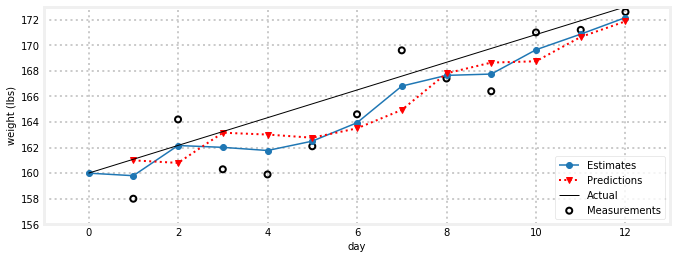

In [26]:
# plot results
book_plots.set_figsize(10)
gh.plot_gh_results(weights, estimates, predictions, [160, 173])

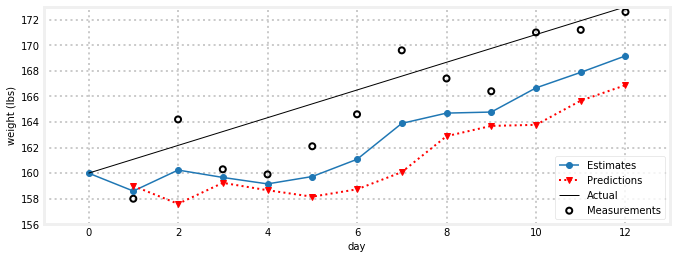

In [35]:
e, p = predict_using_gain_guess(initial_estimate, -1.)
gh.plot_gh_results(weights, e, p, [160, 173])

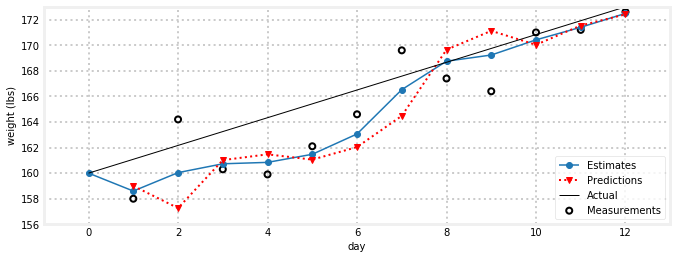

In [36]:
weight = 160.  # initial guess
gain_rate = -1.0  # initial guess

time_step = 1.
weight_scale = 4./10
gain_scale = 1./3
estimates = [weight]
predictions = []

for z in weights:
    # prediction step
    weight = weight + gain_rate*time_step
    gain_rate = gain_rate
    predictions.append(weight)
    
    # update step    
    residual = z - weight
    
    gain_rate = gain_rate + gain_scale   * (residual/time_step)
    weight    = weight    + weight_scale * residual
  
    estimates.append(weight)

gh.plot_gh_results(weights, estimates, predictions, [160, 173])